In [12]:
import pandas as pd
import plotly.graph_objects as go

In [13]:
df = pd.read_csv('Meteorite_Landings_Sample.csv')
met.head()

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation,log_mass
0,Northwest Africa 3126,31254,Valid,LL3.7,173.000,Found,2001.0,NaN,NaN,NaN,5.153292
1,LaPaz Icefield 04605,45163,Valid,L5,63.000,Found,2004.0,NaN,NaN,NaN,4.143135
2,Yamato 980593,37216,Valid,L3,10.913,Found,1998.0,NaN,NaN,NaN,2.389955
3,Queen Alexandra Range 97279,20737,Valid,LL5,27.300,Found,1997.0,-84.00000,168.00000,"(-84.0, 168.0)",3.306887
4,Elephant Moraine 90798,9207,Valid,L6,20.900,Found,1990.0,-76.28535,156.44404,"(-76.28535, 156.44404)",3.039749


In [14]:
df.index

RangeIndex(start=0, stop=200, step=1)

In [15]:
df.tail

<bound method NDFrame.tail of                             name     id nametype recclass   mass (g)   fall  \
0          Northwest Africa 3126  31254    Valid    LL3.7    173.000  Found   
1           LaPaz Icefield 04605  45163    Valid       L5     63.000  Found   
2                  Yamato 980593  37216    Valid       L3     10.913  Found   
3    Queen Alexandra Range 97279  20737    Valid      LL5     27.300  Found   
4         Elephant Moraine 90798   9207    Valid       L6     20.900  Found   
..                           ...    ...      ...      ...        ...    ...   
195                     Wooramel  24335    Valid       L5  71000.000  Found   
196                 Bluewing 031  51575    Valid       H5    170.000  Found   
197                 Yamato 86011  29517    Valid       H5      9.130  Found   
198  Queen Alexandra Range 94454  20086    Valid       L6      5.000  Found   
199          Miller Range 090893  54416    Valid      LL6      4.200  Found   

       year    reclat

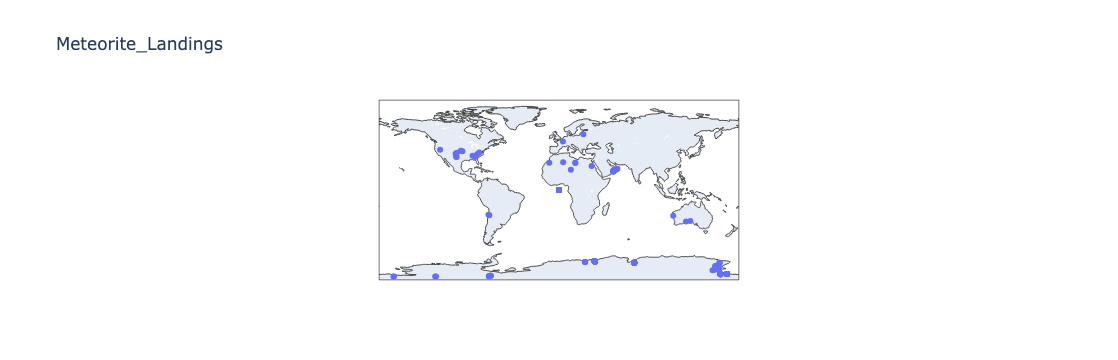

In [16]:
fig1 = go.Figure(data=go.Scattergeo(
    lon = df['reclong'],
    lat = df['reclat'],
    mode = 'markers'
))

fig1.update_layout(
    title = 'Meteorite_Landings',
    geo_scope = 'world',
)

fig1.show()

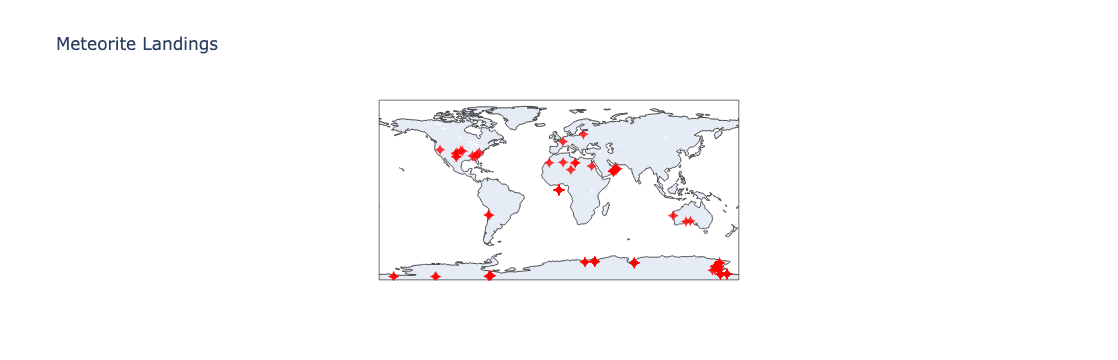

In [17]:
fig2 = go.Figure(data = go.Scattergeo(
    lon = df['reclong'],
    lat = df['reclat'],
    mode = 'markers',
    marker = {'size': 8,
              'opacity': 0.8,
              'symbol': 'star-diamond',
              'color': 'red'}
))

fig2.update_geos(projection_type = 'equirectangular')

fig2.update_layout(
    title = 'Meteorite Landings',
    geo_scope = 'world' # 'usa', 'asia', 'europe', 'africa'
)

fig2.show()

In [18]:
import numpy as np
df['log_mass'] = df['mass (g)'].apply(np.log)

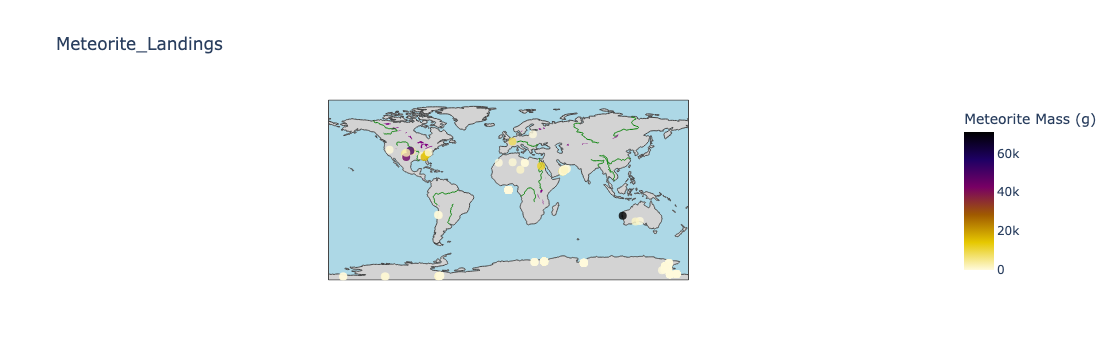

In [22]:
fig3 = go.Figure(data=go.Scattergeo(
    lon = df['reclong'],
    lat = df['reclat'],
    text = df['mass (g)'],
    mode = 'markers',
    marker = dict(
        size = 8,
        opacity = 0.8,
        reversescale = True,
        autocolorscale = False,
        symbol = 'circle',
        colorscale = 'electric',
        color = df['mass (g)'],
        colorbar = dict(
            title=dict(
                text = 'Meteorite Mass (g)'
            )
        )
    )
))

fig3.update_geos(
    projection_type = 'equirectangular',
    showland = True, landcolor = 'lightgrey',
    showocean = True, oceancolor = 'lightblue',
    showlakes= True, lakecolor = 'purple',
    showrivers = True, rivercolor = 'green'

)

fig3.update_layout(
    title = 'Meteorite_Landings',
    geo_scope = 'world',
)

fig3.show()

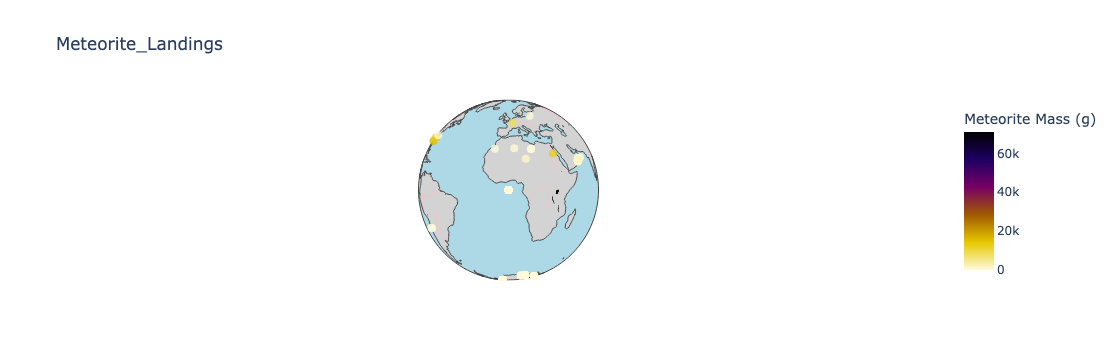

In [25]:
fig4 = go.Figure(data=go.Scattergeo(
    lon = df['reclong'],
    lat = df['reclat'],
    text = df['mass (g)'],
    mode = 'markers',
    marker = dict(
        size = 8,
        opacity = 0.8,
        reversescale = True,
        autocolorscale = False,
        symbol = 'circle',
        colorscale = 'electric',
        color = df['mass (g)'],
        colorbar = dict(
            title=dict(
                text = 'Meteorite Mass (g)'
            )
        )
    )
))

fig4.update_geos(
    projection_type = 'orthographic',
    showland = True, landcolor = 'lightgrey',
    showocean = True, oceancolor = 'lightblue',
    showlakes= True, lakecolor = 'black',
    showrivers = True, rivercolor = 'pink'

)

fig4.update_layout(
    title = 'Meteorite_Landings',
    geo_scope = 'world',
)

fig4.show()

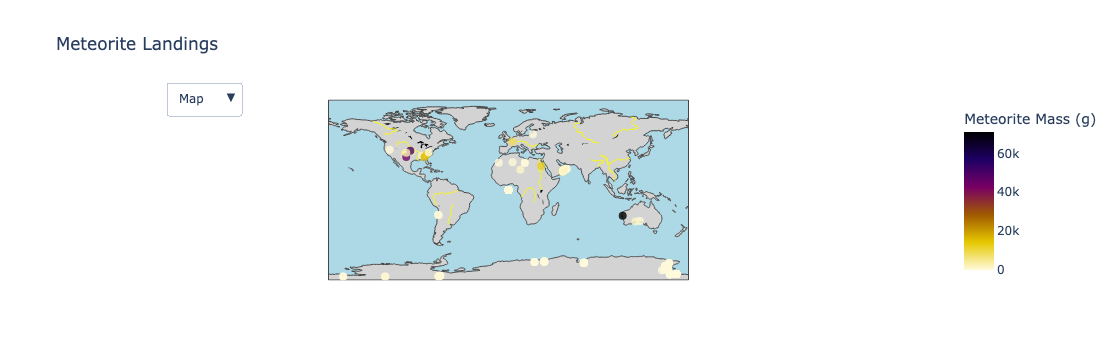

In [26]:
fig5 = go.Figure()


fig5.add_trace(
    go.Scattergeo(
    lon = df['reclong'],
    lat = df['reclat'],
    text = df['mass (g)'],
    mode = 'markers',
    marker = dict(
        size = 8,
        opacity = 0.8,
        reversescale = True,
        autocolorscale = False,
        symbol = 'circle',
        colorscale = 'electric',
        color = df['mass (g)'],
        colorbar = dict(
            title=dict(
                text = 'Meteorite Mass (g)'
            )
        )
    )
))
fig5.update_geos(
    projection_type = 'equirectangular',
    showland = True, landcolor = 'lightgrey',
    showocean = True, oceancolor = 'lightblue',
    showlakes= True, lakecolor = 'black',
    showrivers = True, rivercolor = 'yellow'

)

button1 = {
    'args': [{'geo': {'projection': {'type':'equirectangular'}}}],
    'label':'Map',
    'method': 'relayout'
}


button2 = {
    'args': [{'geo': {'projection': {'type':'orthographic'}}}],
    'label':'Globe',
    'method': 'relayout'
}

fig5.update_layout(
    title = 'Meteorite Landings',
    geo_scope = 'world',
    updatemenus = [
        dict(
            buttons = [button1, button2],
            direction = 'down',
            x = 0.1,
            xanchor = 'left',
            y = 1.1,
            yanchor = 'top'
        )
    ]
)

            
fig5.show()

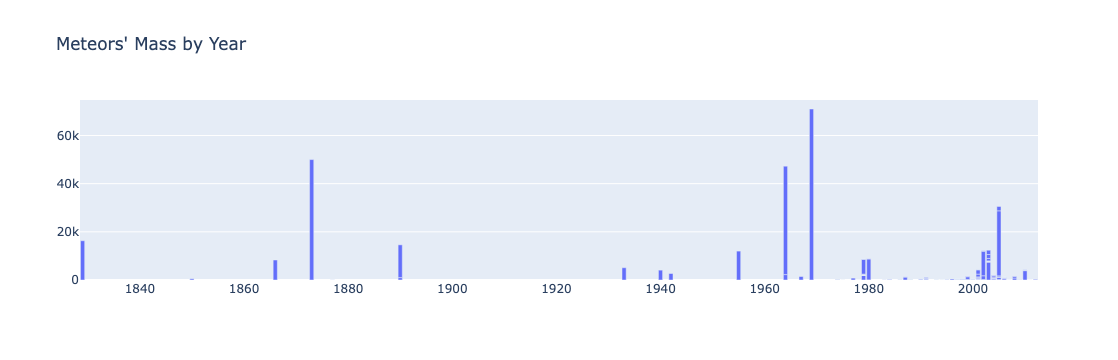

In [27]:
df.columns = [col.replace("mass (g)", "mass") for col in df. columns]

fig6 = go.Figure()

fig6.add_trace(
    go.Bar(
        x =df.year, y = df.mass
    ))
fig6.update_layout(
    title_text = "Meteors' Mass by Year"
    
)
fig6.show()

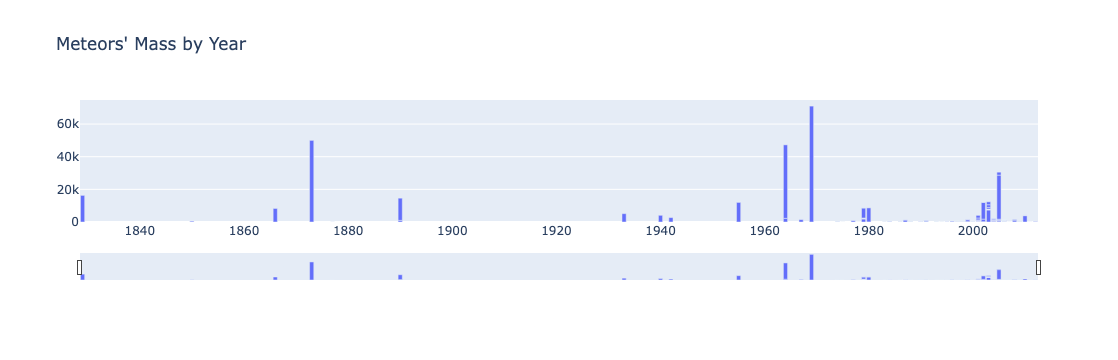

In [28]:
fig7 = go.Figure()

fig7.add_trace(
    go.Bar(
        x = df.year, y = df.mass
    ))
fig7.update_layout(
    title_text = "Meteors' Mass by Year"
    
)

fig7.update_layout(
    xaxis = dict(
        rangeslider = dict(
        visible = True
    ),
    type = "date"
    )
)
fig7.show()